                                                Titanic Competition

Importing all the necessary packages and reading the csv file.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

file = pd.read_csv("titaniccompetitiontrain.csv")
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking whether any columns in the dataset is having null values. We have got 3 columns with null values

In [37]:
file.columns[file.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In the Age column we have only 714 entries out of 891.

In [39]:
file['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

So, we use fillna method to replace the NaN values with mean value of the Age column.

In [40]:
file['Age'].fillna(file['Age'].mean(),inplace=True)
file['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Now, we map the sex column to dummies (i.e) 0's and 1's.

In [44]:
file['Sex'] = file['Sex'].map({'male':'1','female':'0'})

In [45]:
file['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: object

Now, we ae converting the dtype od sex column from object to int.

In [46]:
file['Sex'] = file['Sex'].astype(int)
file['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

Now, we slice the original dataframe to have only limited features.

In [49]:
new_file = file[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch']]
new_file.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0


In [52]:
new_file['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

We have 549 0's i.e - not survived and 342 1's i.e survived.

In [53]:
new_file['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Now , we split the training dataset into train and test data set.

In [55]:
from sklearn.cross_validation import train_test_split
train,test = train_test_split(new_file,test_size=0.2,random_state=42)
features_train = train[['PassengerId','Pclass','Sex','Age','SibSp','Parch']]
features_test = test[['PassengerId','Pclass','Sex','Age','SibSp','Parch']]
labels_train = train[['Survived']]
labels_test = test[['Survived']]
print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(712, 6)
(179, 6)
(712, 1)
(179, 1)


Now we run through some series of algorithms and their accuracies, you see that random forest performs best among this.

{'GaussianNB': 0.77094972067039103, 'DecisionTreeClassifier': 0.6983240223463687, 'RandomForestClassifier': 0.82122905027932958, 'KNeighborsClassifier': 0.55307262569832405, 'LogisticRegression': 0.7988826815642458}


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


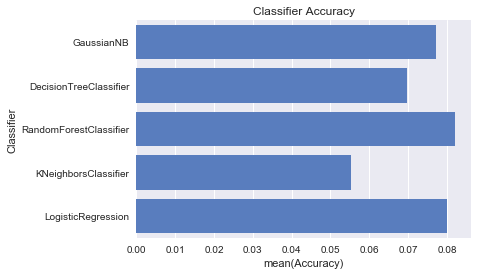

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

names = ['GaussianNB','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','LogisticRegression']
classifiers = [GaussianNB(),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                KNeighborsClassifier(),
                LogisticRegression()]
accu_data = []
final_dic = {}
for name,clf in zip(names,classifiers):
    clf.fit(features_train,labels_train)
    accuracy = clf.score(features_test,labels_test)
    accu_data.append(accuracy)
    final_dic = dict(zip(names,accu_data))
print(final_dic)

for clf in final_dic:
    final_dic[clf] = final_dic[clf] / 10.0
    log_entry = pd.DataFrame([[clf,final_dic[clf]]],columns=log_cols)
    log = log.append(log_entry)
    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [93]:
from sklearn.ensemble import RandomForestClassifier
final_clf = RandomForestClassifier(random_state=0, n_jobs=2)
training = final_clf.fit(features_train,labels_train)
accuracy = final_clf.score(features_test,labels_test)
importances = training.feature_importances_
print("RandomForestClassifier:",accuracy)
print(importances)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier: 0.810055865922
[ 0.31024851  0.10848916  0.27451036  0.21138717  0.05785526  0.03750955]


Now, reading the test dataset and printing the head of that dataset.

In [82]:
test_file = pd.read_csv('titaniccompetitiontest.csv')
test_file.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Mapping the sex column to 0's and 1's and converting them into int type, as we did in the training data set.

In [83]:
test_file['Sex'] = test_file['Sex'].map({'male':'1','female':'0'})

In [84]:
test_file['Sex'].head()

0    1
1    0
2    1
3    1
4    0
Name: Sex, dtype: object

In [85]:
test_file['Sex'] = test_file['Sex'].astype(int)
test_file['Sex'].head()

0    1
1    0
2    1
3    1
4    0
Name: Sex, dtype: int32

In [86]:
test_file.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


Replacing Nan values with mean() values.

In [88]:
test_file['Age'].fillna(test_file['Age'].mean(),inplace=True)
print(test_file['Age'].isnull().any())

False


In [89]:
test_file.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,0.481622,12.634534,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,1.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


Now, slicing the test data to match the train data to perform predictions.

In [92]:
new_test_file = test_file[['PassengerId','Pclass','Sex','Age','SibSp','Parch']]
new_test_file.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,1,34.5,0,0
1,893,3,0,47.0,1,0
2,894,2,1,62.0,0,0
3,895,3,1,27.0,0,0
4,896,3,0,22.0,1,1


In [96]:
new_test_file.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344
std,120.810458,0.841838,0.481622,12.634534,0.896760,0.981429
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000
50%,1100.500000,3.000000,1.000000,30.272590,0.000000,0.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000


Now, predicting the results of survival rate of passengers using the random forest classifier trained model.

In [122]:
predictions = final_clf.predict(new_test_file)
print(predictions)
type(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0]


numpy.ndarray

Now, converting the numpy array of predicitions to dataframe.

In [138]:
prediction = pd.DataFrame(predictions,columns=['Survived'])
type(prediction)

pandas.core.frame.DataFrame

Slicing the passenger id column from the test dataset.

In [139]:
passengerid = new_test_file[['PassengerId']]
type(passengerid)

pandas.core.frame.DataFrame

Resetting the index of the two dataframes, so that they both can be concatenated together.

In [140]:
prediction.reset_index(drop=True,inplace=True)
passengerid.reset_index(drop=True,inplace=True)

Concatenating two dataframes.

In [145]:
results = pd.concat([passengerid,prediction],axis=1)

In [146]:
results.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


Finally, writing the results to the CSV file.

In [147]:
submission = pd.DataFrame(results).to_csv('Titanic_Submission.csv',index = False)